In [1]:
%matplotlib inline

# math and data manipulation
import numpy as np
import pandas as pd

# to handle paths
from pathlib import Path

# set random seeds 
from numpy.random import seed
from tensorflow import set_random_seed

from sklearn.preprocessing import MinMaxScaler

from csef.model import lstm
from csef.data import preprocessing, load_data
from csef.utils import performance

RANDOM_SEED = 2018
seed(RANDOM_SEED)
set_random_seed(RANDOM_SEED)

## Data Loading

In [2]:
data_mapping = load_data.load_data()
consumption_train = data_mapping['consumption_train']
cold_start_test = data_mapping['cold_start_test']
submission_format = data_mapping['submission_format']
meta = data_mapping['meta']

In [3]:
samp_df = load_data.sampling_data(consumption_train)

In [4]:
load_data.describe_training_data(samp_df)

There are 10 training series totaling 280 days (6720 hours) of consumption data.


## Training

In [5]:
# scale training data
scaler = MinMaxScaler(feature_range=(-1, 1))
samp_df['consumption'] = scaler.fit_transform(samp_df['consumption'].values.reshape(-1, 1))

/home/thuongdinh/.virtualenvs/mlcsef/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
train_df, test_df = load_data.train_test_split(samp_df)

/home/thuongdinh/ws/asnet-training/ml-training/ml-energy-forecasting/csef/data/load_data.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  split_train[group_col] = ser_id
/home/thuongdinh/ws/asnet-training/ml-training/ml-energy-forecasting/csef/data/load_data.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  split_test[group_col] = ser_id


In [7]:
load_data.describe_training_data(train_df)

There are 10 training series totaling 280 days (6720 hours) of consumption data.


In [8]:
config = {
    'n_input': 24,
    'n_nodes': 24,
    'n_batch': 1
}

### SummaryNodeLSTM

In [9]:
scores = performance.repeat_evaluate(lstm.SummaryNodeLSTM, train_df, test_df, config, scaler, n_repeats=10)

 > 0.293
 > 0.291
 > 0.289
 > 0.285
 > 0.298
 > 0.296
 > 0.287
 > 0.288
 > 0.291
 > 0.303


lstm: 0.292 RMSE (+/- 0.005)


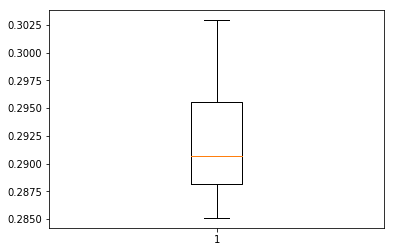

In [10]:
performance.summarize_scores('lstm', scores)

In [11]:
test_df['series_id'].unique()

array([100283, 100419, 100973, 101321, 101569, 101751, 101980, 102008,
       102093, 103320])

In [12]:
test_df[test_df['series_id'] == 100973].head(100)

,series_id,timestamp,consumption,temperature
116904,100973,2015-10-23 00:00:00,-0.955621,NaN
116905,100973,2015-10-23 01:00:00,-0.955647,NaN
116906,100973,2015-10-23 02:00:00,-0.955374,NaN
116907,100973,2015-10-23 03:00:00,-0.950269,NaN
116908,100973,2015-10-23 04:00:00,-0.944840,NaN
116909,100973,2015-10-23 05:00:00,-0.944371,NaN
116910,100973,2015-10-23 06:00:00,-0.925139,NaN
116911,100973,2015-10-23 07:00:00,-0.903602,6.083333
116912,100973,2015-10-23 08:00:00,-0.915699,6.800000
116913,100973,2015-10-23 09:00:00,-0.913498,8.250000


### StackedLSTM

In [ ]:
scores = repeat_evaluate(lstm.StackedLSTM, train_df, test_df, config, scaler, n_repeats=10)
# performance.summarize_scores('lstm', scores)

In [14]:
scores

[0.2733374232961312,
 0.2835079583452075,
 nan,
 nan,
 0.7671881835560315,
 7.211318268550568,
 0.27289467385306143,
 0.2954605495593481,
 nan,
 0.2932106019049768]